In [1]:
library(tidyverse)
library(RColorBrewer)

options(repr.plot.width = 10, repr.plot.height = 10)

# you might need to change these directories depends on where the results you downloaded or saved to.
indir = '../Benchmarking/results/simulated/collated_results/'

# Uncomment output directory and code blocks for saving plots if wanted.
# outdir = './Benchmarking'
# dir.create(outdir)


── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.2      ✔ forcats 0.5.1 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Benchmarking on simulated data

The collated benchmarking results for the simulated data are loaded in order to plot summary statistics.

## Simulated data based on Zeisel

In [2]:
# Rename file to name of the benchmarking results.
zeisel_eval <- readRDS(file.path(indir, "221114_zeisel_splatter_sim_preprocessed.rds"))

# Not a single BC_Spectral run was successful and therefore removed.
zeisel_eval <- zeisel_eval %>% 
    filter(algorithm != "BC_Spectral")

head(zeisel_eval)

Warning message in gzfile(file, "rb"):
“cannot open compressed file '../Benchmarking/results/simulated/collated_results//221114_zeisel_splatter_sim_preprocessed.rds', probable reason 'No such file or directory'”


ERROR: Error in gzfile(file, "rb"): cannot open the connection


We can see below that some algorithms failed to produce results on some runs:

In [3]:
table(zeisel_eval$algorithm,
      paste(zeisel_eval$dePROB, zeisel_eval$defacLOC, zeisel_eval$defacSCALE, sep="_"))

                  
                   0.02_0.75_0.75 0.02_1.5_1.5 0.06_0.75_0.75 0.06_1.5_1.5
  Bimax                        36           36             36           43
  CCA                         106          105            106          105
  IRISFGM                      81           81             81           81
  Monocle3                    108          108            108          108
  Plaid                       108          108            108          108
  QUBIC                       108          108            108          108
  Seurat                      108          108            108          108
  Unibic                      104          106            107          101
  Xmotifs                     107          108            108          108
  caclust_leiden              108          108            108          108
  caclust_spectral            107          108            108          108
  sv4d                        108          108            108          108
      

## Simulated data based on pbmc3k

In [4]:
# Rename file to name of the benchmarking results.
pbmc_eval <- readRDS(file.path(indir, "221114_pbmc3k_splatter_sim_preprocessed.rds"))

pbmc_eval <- pbmc_eval %>% filter(algorithm != "BC_Spectral")

head(pbmc_eval)

algorithm,ARI_cells,ARI_genes,relevance,recovery,clustering_error,RNIA,ngenes,ncells,nclust_found,⋯,Qcmin,logfc_thr,min_perc,rthr,redm,ngene_pg,help,dePROB,defacLOC,defacSCALE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>
Bimax,NA,NA,NA,NA,NA,NA,2000,996,0,⋯,NA,NA,NA,NA,UMAP,100,FALSE,0.02,0.75,0.75
Bimax,NA,NA,NA,NA,NA,NA,2000,996,0,⋯,NA,NA,NA,NA,UMAP,100,FALSE,0.02,0.75,0.75
Bimax,NA,NA,NA,NA,NA,NA,2000,996,0,⋯,NA,NA,NA,NA,UMAP,100,FALSE,0.02,0.75,0.75
Bimax,NA,NA,NA,NA,NA,NA,2000,996,0,⋯,NA,NA,NA,NA,UMAP,100,FALSE,0.02,0.75,0.75
Bimax,NA,NA,NA,NA,NA,NA,2000,996,0,⋯,NA,NA,NA,NA,UMAP,100,FALSE,0.02,0.75,0.75
Bimax,NA,NA,NA,NA,NA,NA,2000,996,0,⋯,NA,NA,NA,NA,UMAP,100,FALSE,0.02,0.75,0.75


In [5]:
table(pbmc_eval$algorithm, 
      paste(pbmc_eval$dePROB, pbmc_eval$defacLOC, pbmc_eval$defacSCALE, sep="_"))

                  
                   0.02_0.75_0.75 0.02_1.5_1.5 0.06_0.75_0.75 0.06_1.5_1.5
  Bimax                       108          108            108          108
  CCA                         108          108            108          108
  IRISFGM                      81           81             81           81
  Monocle3                    104          107            108          108
  Plaid                       108          108            108          108
  QUBIC                       108          108            108          108
  Seurat                      108          108            108          108
  Unibic                      104          104            106          106
  Xmotifs                     108          108            108          108
  caclust_leiden              108          108            108          108
  caclust_spectral            108          108            108          108
  sv4d                        108          108            108          108
      

## Evaluation

In [6]:
dfz <- zeisel_eval %>%
    mutate(dataset = "zeisel") %>%
    mutate(algorithm = gsub("caclust", "CAbiNet", algorithm)) %>%
    mutate(simulation = paste(dePROB, defacLOC, defacSCALE, sep="_")) %>%
    mutate(simulation = factor(simulation, levels = c('0.02_0.75_0.75', 
                                                      '0.06_0.75_0.75',
                                                      '0.1_0.75_0.75',
                                                      '0.02_1.5_1.5',
                                                      '0.06_1.5_1.5',
                                                      '0.1_1.5_1.5')))

dfp <- pbmc_eval %>%
    mutate(dataset = "pbmc3k") %>%
    mutate(algorithm = gsub("caclust", "CAbiNet", algorithm)) %>%
    mutate(simulation = paste(dePROB, defacLOC, defacSCALE, sep="_")) %>%
    mutate(simulation = factor(simulation, levels = c('0.02_0.75_0.75', 
                                                      '0.06_0.75_0.75',
                                                      '0.1_0.75_0.75',
                                                      '0.02_1.5_1.5',
                                                      '0.06_1.5_1.5',
                                                      '0.1_1.5_1.5')))

df_all <- rbind(dfz,dfp)
df <- df_all %>% group_by(simulation, algorithm, dataset) %>%
        mutate(mean_CE = mean(clustering_error, na.rm = TRUE)) %>%
        select(dataset, simulation, algorithm, mean_CE) %>%
        distinct() %>%
        ungroup()

df$algorithm <- gsub("sv4d", "s4vd", df$algorithm)

df$algorithm <- factor(df$algorithm, levels = c('CAbiNet_leiden',
                                                'CAbiNet_spectral',
                                                'Seurat',
                                                'Monocle3',
                                                'Bimax',
                                                'CCA',
                                                'QUBIC',
                                                'IRISFGM',
                                                's4vd',
                                                'Plaid',
                                                'Unibic',
                                                'Xmotifs'
                                                ))

### Figure 5

#### panel a - runtime

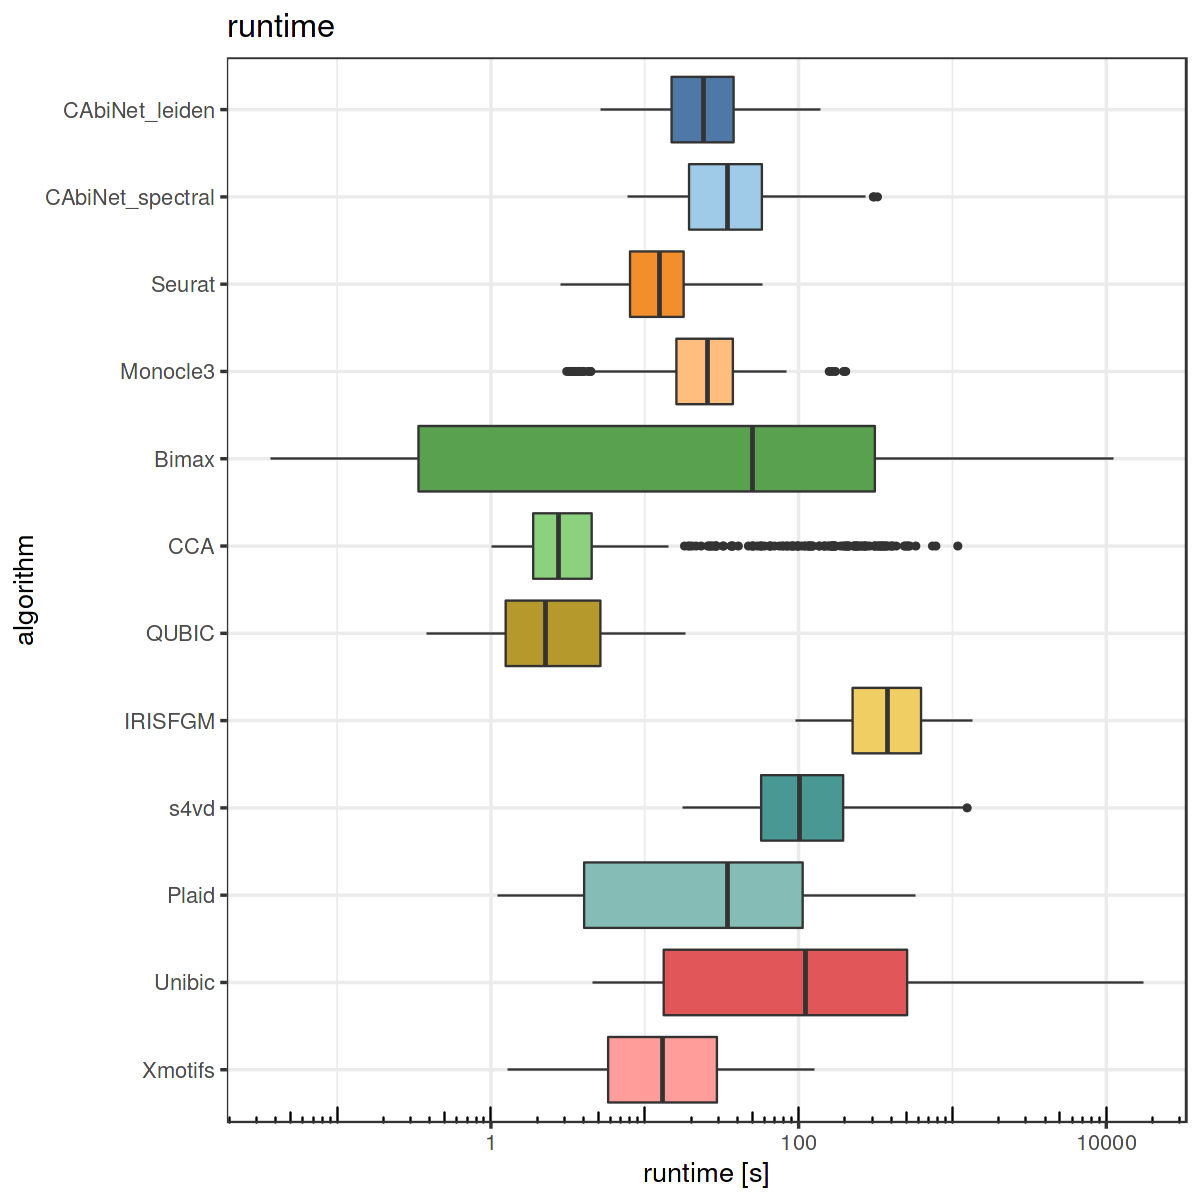

In [7]:

total_runtime <- df_all %>%
    mutate(algorithm = gsub("caclust", "CAbiNet", algorithm)) %>%
    mutate(total_runtime = if_else(condition = is.na(runtime_dimreduc),
                                   true = runtime,
                                   false = runtime + runtime_dimreduc)) %>%
    mutate(algorithm = gsub("sv4d", "s4vd", algorithm)) %>%
    mutate(algorithm = factor(algorithm, levels = c('CAbiNet_leiden',
                                                'CAbiNet_spectral',
                                                'Seurat',
                                                'Monocle3',
                                                'Bimax',
                                                'CCA',
                                                'QUBIC',
                                                'IRISFGM',
                                                's4vd',
                                                'Plaid',
                                                'Unibic',
                                                'Xmotifs')))

p <- ggplot(total_runtime, aes(x=algorithm, y = total_runtime, fill = algorithm)) +
    geom_boxplot() +
    scale_y_log10() +
    annotation_logticks(sides = "b") +
    scale_x_discrete(limits = rev(levels(total_runtime$algorithm))) +
    coord_flip() +
    labs(title = "runtime",
         y = "runtime [s]",
         x = "algorithm") +
    theme_bw() +
    ggthemes::scale_fill_tableau(palette = "Tableau 20") +
    scale_color_manual(values = list("zeisel" = "#cf3e53", "pbmc3k" = "#466f9d")) + # "#ed444a"
    theme_bw(base_size = 16) +
    theme(legend.position = "none")


p

# ggsave(plot = p, 
#        filename = file.path(outdir, "total_runtime_fig6_panel_a.pdf"),
#        width = 2200,
#        height = 2000,
#        units = "px")

#### panel b - Clustering Error (CE)

Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


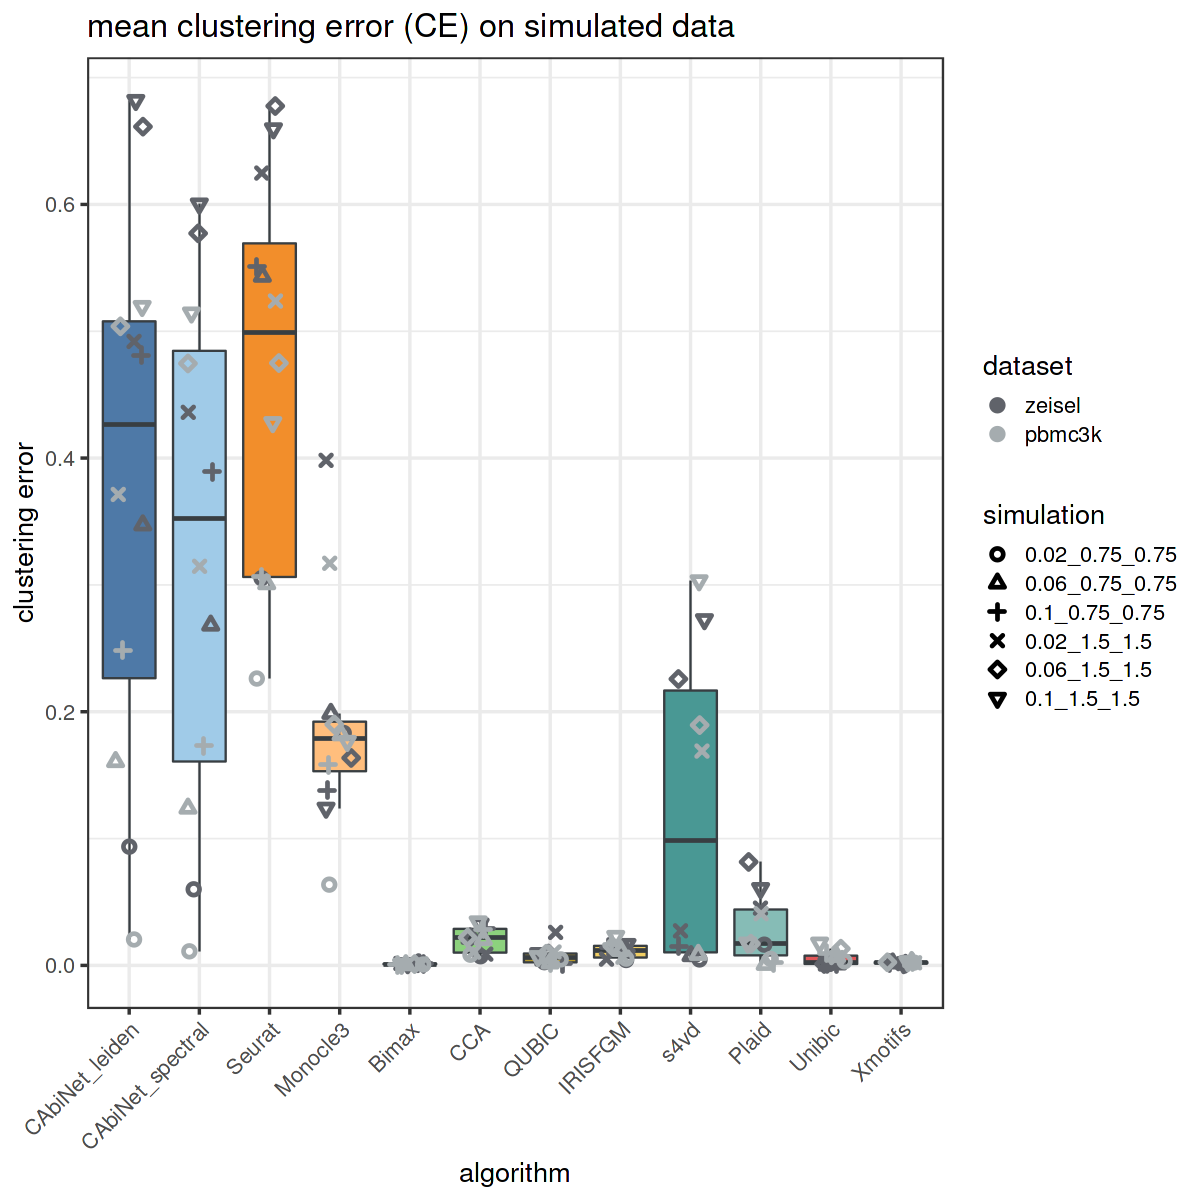

In [8]:

p <- df %>%
ggplot(aes(x=algorithm, 
           y=mean_CE)) +
    geom_boxplot(aes(fill = algorithm),
                 color = "#383e42", 
                 alpha = 1, 
                 outlier.alpha = 0)+
    geom_jitter(aes(x=algorithm, 
                    y=mean_CE, 
                    color = dataset, 
                    group = dataset, 
                    shape = simulation),
                    stroke =1.5,
                    size = 2,
                    width = 0.2) +
    labs(title = "mean clustering error (CE) on simulated data",
         y = "clustering error",
         x = "algorithm") +
    scale_shape_manual(values = seq_len(length(df$simulation))) +
    ggthemes::scale_fill_tableau(palette = "Tableau 20",
                              type = "regular",
                              direction = 1)+
    scale_color_manual(values = list("zeisel" = "#60636a", "pbmc3k" = "#a5acaf")) + 
    theme_bw(base_size = 16) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    guides(fill = "none")

p


# ggsave(plot = p, 
#        filename = file.path(outdir, "CE_summary_mean_fig6_panel_b.pdf"),
#        width = 3000,
#        height = 2000,
#        units = "px")


# Benchmarking on experimental data

## Load the evaluation results of simulated and real data sets

The evaluation results are generated with script Benchmarking/cluster_submit_real.sh and Benchmarking/cluster_submit_sm.sh first, then collected into data.frames by script collate_results.R (See README.md file in folder Benchmarking/)
Change the paths of files to your local directories before running it

In [9]:
evldir = '../Benchmarking/results/real/collated_results/'
simdir = '../Benchmarking/results/simulated/collated_results/'

## Read and gather evaluation results of both simulated and real data

In [10]:
### Load the results of real data sets
files = list.files(evldir, '*.rds', full.names = T)
df = data.frame()
for (file in files){
  
  data = readRDS(file)
  df = rbind(df, data)
  
}
df$dataset = gsub('_filtered', '', df$dataset)

### Simulated data sets

simdf <- rbind(zeisel_eval, pbmc_eval)

simdf$dataset = paste(simdf$dataset, simdf$dePROB, simdf$defacLOC, simdf$defacSCALE, sep = '_')

commoncols = intersect(colnames(df), colnames(simdf))

### Merge two data frames
df = rbind(df[,commoncols], simdf[, commoncols])



### Rename data sets & algorithms

In [11]:
df %>% filter(algorithm != 'BC_Spectral') -> df
df$pattern = paste0(df$algorithm, df$dataset)

df %>%
  group_by(dataset, algorithm) %>% 
  mutate(fail.n = sum(is.na(ARI_cells)), scsd.n = n()) %>% 
  filter(fail.n == scsd.n) -> test

test %>% group_by(algorithm, dataset) %>% arrange(runtime) %>% select(-fail.n, -scsd.n) %>% top_n(n = 1, wt = runtime) -> df_na
test$pattern = paste0(test$algorithm, test$dataset)

subdf = df[!(df$pattern %in% test$pattern), ]
subdf = subdf[!is.na(subdf$ARI_cells),]
subdf = rbind(subdf, df_na)
subdf$algorithm[subdf$algorithm == 'sv4d'] = 's4vd'

df$pattern = paste0(df$algorithm, df$dataset)

subdf$dataset[subdf$dataset == 'PBMC_10X'] = 'PBMC10x'
subdf$dataset[subdf$dataset == "Tirosh_nonmaglignant"] = "Tirosh"
subdf$dataset[subdf$dataset == "ZeiselBrain"] = "zeisel"
subdf$dataset[subdf$dataset == "dmel_E14-16h"] = "DmelSpatial"
subdf$dataset[subdf$dataset == "tabula_sapiens_tissue"] = 'TabulaSapiens'
subdf$dataset[subdf$dataset == "brain_organoids"] = "BrainOrganoids"

subdf$algorithm[subdf$algorithm == "caclust_leiden"] = "CAbiNet_leiden"
subdf$algorithm[subdf$algorithm == "caclust_spectral"] = "CAbiNet_spectral"



subdf$algorithm = factor(subdf$algorithm, levels = c('CAbiNet_leiden','CAbiNet_spectral',
                                                     'Seurat', 'Monocle3',
                                                      'Bimax', 'CCA',
                                                     'QUBIC', 'IRISFGM',
                                                      'Plaid', 's4vd', 
                                                     'Unibic','Xmotifs'))

df_g <- subdf %>% group_by(algorithm, dataset) %>% mutate(Mean_ARI = mean(ARI_cells), 
                                               Max_ARI = max(ARI_cells),
                                               Median_ARI = median(ARI_cells))
df_g = df_g[df_g$dataset != 'HeOrganAtlas',]
df_g$dataset = factor(df_g$dataset, levels = c("Darmanis", "FreytagGold", "PBMC10x", 
                                               "Tirosh", "zeisel", "BaronPancreas",
                                               "DmelSpatial", "TabulaSapiens", "BrainOrganoids", unique(simdf$dataset)))



### Figure 6c: The average ARI scores 

Warning message:
“Removed 11 rows containing missing values (geom_text).”
Saving 6.67 x 6.67 in image

Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


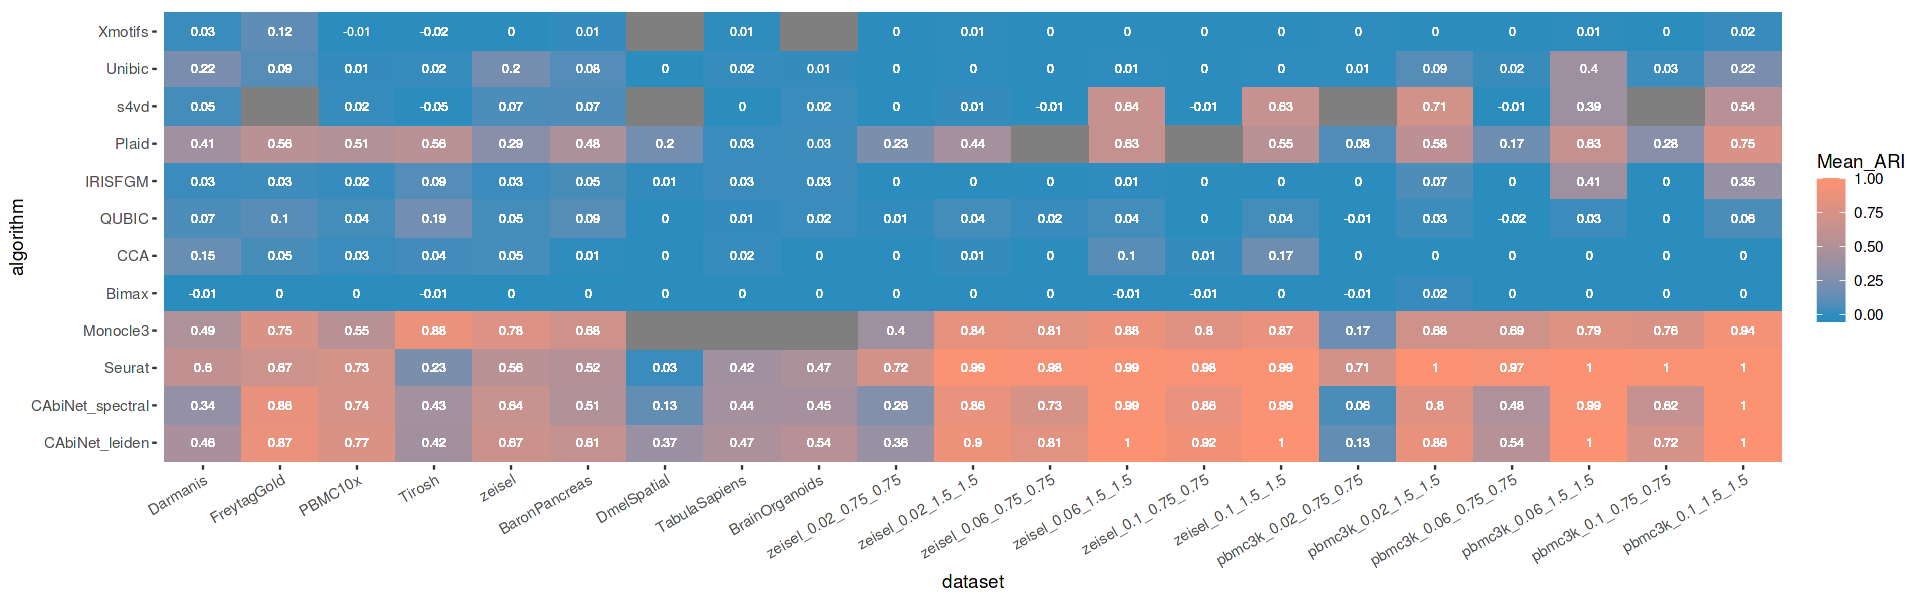

In [12]:
options(repr.plot.width=16, repr.plot.height=5)

ggplot(df_g, aes(dataset, algorithm, fill = Mean_ARI)) + geom_tile() + theme_bw() +
  geom_text(aes(label = round(Mean_ARI, 2)), color = "white", size = 2.5) +
  scale_fill_gradient2(low = "#2b8cbe",  #"#03436A",
                       mid = "#2b8cbe",
                       high = "#fc9272") +
  theme(panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        axis.text.x = element_text(angle = 30, hjust = 1)) 

# ggsave(plot = p, 
#        filename = file.path(outdir, "mean_ARI_fig5_panel_c.pdf"))

# R environment

In [13]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: MarIuX64 2.0 GNU/Linux

Matrix products: default
BLAS:   /pkg/R-4.2.1-0/lib/R/lib/libRblas.so
LAPACK: /pkg/R-4.2.1-0/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8 LC_NUMERIC=C         LC_TIME=C           
 [4] LC_COLLATE=C         LC_MONETARY=C        LC_MESSAGES=C       
 [7] LC_PAPER=C           LC_NAME=C            LC_ADDRESS=C        
[10] LC_TELEPHONE=C       LC_MEASUREMENT=C     LC_IDENTIFICATION=C 

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] RColorBrewer_1.1-3 forcats_0.5.1      stringr_1.4.1      dplyr_1.0.10      
 [5] purrr_0.3.5        readr_2.1.2        tidyr_1.2.1        tibble_3.1.8      
 [9] ggplot2_3.3.6      tidyverse_1.3.2   

loaded via a namespace (and not attached):
 [1] lubridate_1.8.0     assertthat_0.2.1    digest_0.6.30      
 [4] utf8_1.2.2          IRdisplay_1.1       R6_2.5.1   